# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



# Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuy hoa
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | shikhany
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tangalle
Processing Record 8 of Set 1 | nikolayevsk-on-amure
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | brookings
Processing Record 12 of Set 1 | boende
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | klyuchi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | thomson
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | astrakhan
Processing Record 22 of Set 1 | sitka
Processing 

Processing Record 42 of Set 4 | slave lake
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | karak city
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | ushtobe
Processing Record 48 of Set 4 | uzgen
Processing Record 49 of Set 4 | la'ie
Processing Record 0 of Set 5 | enoch
Processing Record 1 of Set 5 | kataragama
City not found. Skipping...
Processing Record 2 of Set 5 | topraisar
Processing Record 3 of Set 5 | amungan
Processing Record 4 of Set 5 | lincheng
Processing Record 5 of Set 5 | nuuk
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | juneau
Processing Record 8 of Set 5 | cill airne
Processing Record 9 of Set 5 | balykchy
Processing Record 10 of Set 5 | abohar
Processing Record 11 of Set 5 | kolonia
Processing Record 12 of Set 5 | whangarei
Processing Record 13 of Set 5 | mount pearl
Processing Record 14 of Set 5 | obo
Processing Record 15 of Set 5 | agat village
Proces

City not found. Skipping...
Processing Record 35 of Set 8 | taoudenni
Processing Record 36 of Set 8 | peace river
Processing Record 37 of Set 8 | nago
Processing Record 38 of Set 8 | tieli
Processing Record 39 of Set 8 | luganville
Processing Record 40 of Set 8 | pindi bhattian
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | leua
Processing Record 43 of Set 8 | road town
Processing Record 44 of Set 8 | tralee
Processing Record 45 of Set 8 | pokhara
Processing Record 46 of Set 8 | zahedan
Processing Record 47 of Set 8 | dien bien phu
Processing Record 48 of Set 8 | hithadhoo
Processing Record 49 of Set 8 | itanhaem
Processing Record 0 of Set 9 | kakamega
Processing Record 1 of Set 9 | hayma'
City not found. Skipping...
Processing Record 2 of Set 9 | chernyshevskiy
Processing Record 3 of Set 9 | starkville
Processing Record 4 of Set 9 | north bend
Processing Record 5 of Set 9 | kabinda
Processing Record 6 of Set 9 | decatur
Processing Record 7 of Set 9 | pitea


Processing Record 25 of Set 12 | greenland
Processing Record 26 of Set 12 | almodovar
Processing Record 27 of Set 12 | keflavik
Processing Record 28 of Set 12 | sola
Processing Record 29 of Set 12 | san jose village
City not found. Skipping...
Processing Record 30 of Set 12 | letterkenny
Processing Record 31 of Set 12 | abrisham
Processing Record 32 of Set 12 | rawdon
Processing Record 33 of Set 12 | la baneza
Processing Record 34 of Set 12 | kristiansund
Processing Record 35 of Set 12 | fairfield
Processing Record 36 of Set 12 | kolonia town
Processing Record 37 of Set 12 | chengde
Processing Record 38 of Set 12 | tukrah
Processing Record 39 of Set 12 | santa rosa misiones
Processing Record 40 of Set 12 | laojunmiao
Processing Record 41 of Set 12 | quatre cocos
Processing Record 42 of Set 12 | krasnokamsk
Processing Record 43 of Set 12 | wonju
Processing Record 44 of Set 12 | kupang
Processing Record 45 of Set 12 | jhargram
Processing Record 46 of Set 12 | acapulco de juarez
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuy hoa,13.0833,109.3000,26.28,85,55,2.63,VN,1701827803
1,hadibu,12.6500,54.0333,24.68,62,51,6.81,YE,1701827252
2,hawaiian paradise park,19.5933,-154.9731,27.16,85,0,4.63,US,1701827803
3,shikhany,52.1167,47.2167,-12.27,99,68,1.61,RU,1701827804
4,albany,42.6001,-73.9662,0.50,88,100,1.31,US,1701827696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuy hoa,13.0833,109.3000,26.28,85,55,2.63,VN,1701827803
1,hadibu,12.6500,54.0333,24.68,62,51,6.81,YE,1701827252
2,hawaiian paradise park,19.5933,-154.9731,27.16,85,0,4.63,US,1701827803
3,shikhany,52.1167,47.2167,-12.27,99,68,1.61,RU,1701827804
4,albany,42.6001,-73.9662,0.50,88,100,1.31,US,1701827696


# Create the Scatter Plots Requested

#### Latitude Vs. Temperature

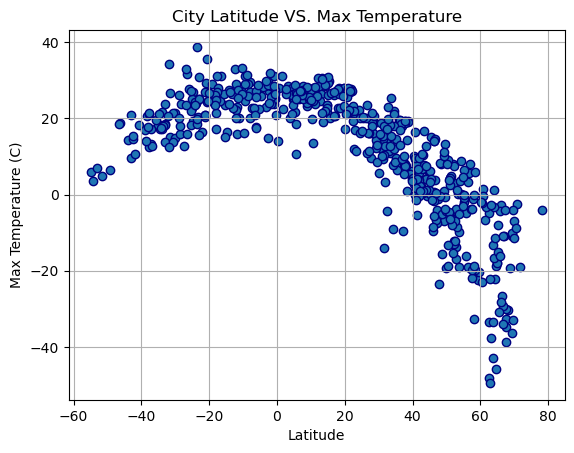

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="navy")

# Incorporate the other graph properties
plt.title("City Latitude VS. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs. Humidity

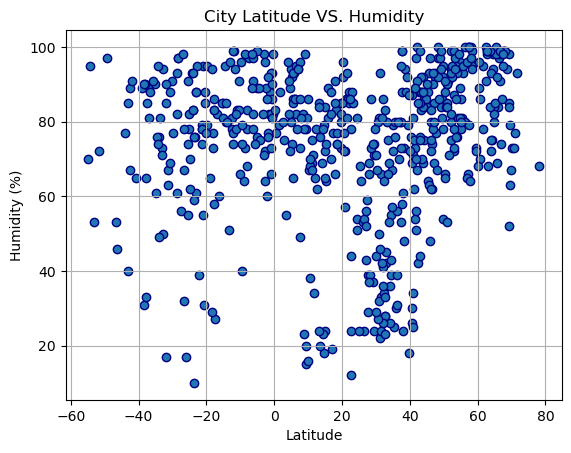

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="navy")

# Incorporate the other graph properties
plt.title("City Latitude VS. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude Vs. Cloudiness

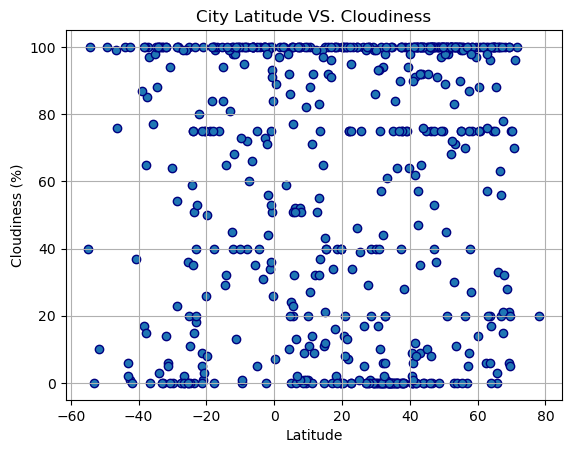

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="navy")

# Incorporate the other graph properties
plt.title("City Latitude VS. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

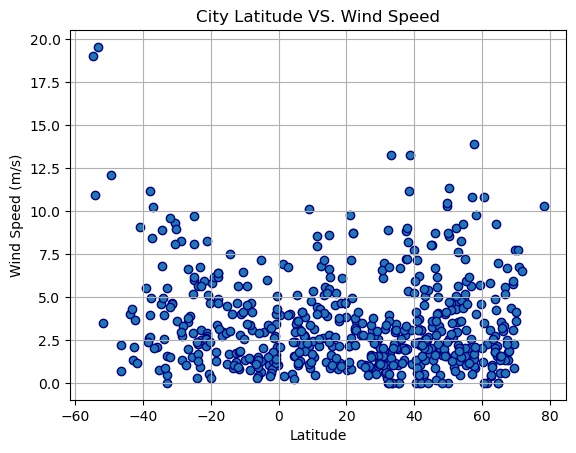

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="navy")

# Incorporate the other graph properties
plt.title("City Latitude VS. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# ---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def makeLinRegression(df, x_Col, y_Col, pos):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[x_Col], df[y_Col])
    
    regress_values = df[x_Col] * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(df[x_Col], df[y_Col])
    
    plt.plot(df[x_Col], regress_values, "r-")
    
    plt.annotate(line_eq,pos,fontsize=15,color="red")
    
    plt.xlabel(x_Col)
    plt.ylabel(y_Col)
    
    
    print(f"The r-value is: {rvalue**2}")
    
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tuy hoa,13.0833,109.3000,26.28,85,55,2.63,VN,1701827803
1,hadibu,12.6500,54.0333,24.68,62,51,6.81,YE,1701827252
2,hawaiian paradise park,19.5933,-154.9731,27.16,85,0,4.63,US,1701827803
3,shikhany,52.1167,47.2167,-12.27,99,68,1.61,RU,1701827804
4,albany,42.6001,-73.9662,0.50,88,100,1.31,US,1701827696


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,blackmans bay,-43.0167,147.3167,20.96,40,6,1.34,AU,1701827805
11,boende,-0.2167,20.8667,20.91,98,84,1.05,CD,1701827805
12,west island,-12.1568,96.8225,28.99,74,98,4.63,CC,1701827805
14,adamstown,-25.0660,-130.1015,22.77,82,100,6.01,PN,1701827806
16,port elizabeth,-33.9180,25.5701,17.28,76,100,2.57,ZA,1701827218


#  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7283045424040447


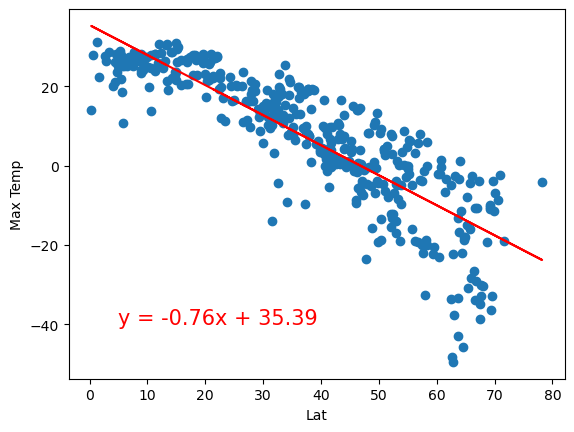

In [15]:
# Linear regression on Northern Hemisphere
North_Hem_Temp = makeLinRegression(northern_hemi_df, "Lat", "Max Temp", (5,-40))

The r-value is: 0.38337793964585404


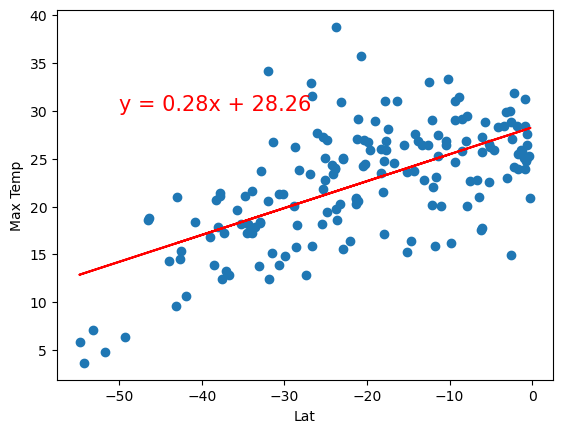

In [16]:
# Linear regression on Southern Hemisphere
South_Hem_Temp = makeLinRegression(southern_hemi_df, "Lat", "Max Temp", (-50,30))

**Discussion about the linear relationship:** Referring to the plots above, the max temperature and the latitude shows a strong negative linear relationship in the Northern Hemisphere whereas in the Southern Hemisphere it is the exact opposite and they have a strong positive linear relationship. 

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08508658183117272


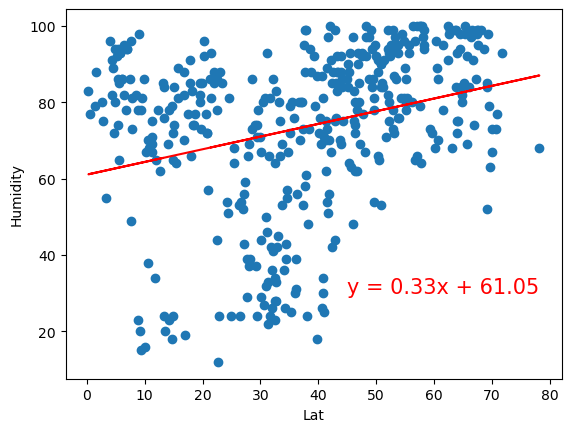

In [17]:
# Northern Hemisphere
North_Hem_Hum = makeLinRegression(northern_hemi_df, "Lat", "Humidity", (45,30))

The r-value is: 0.04455496946143294


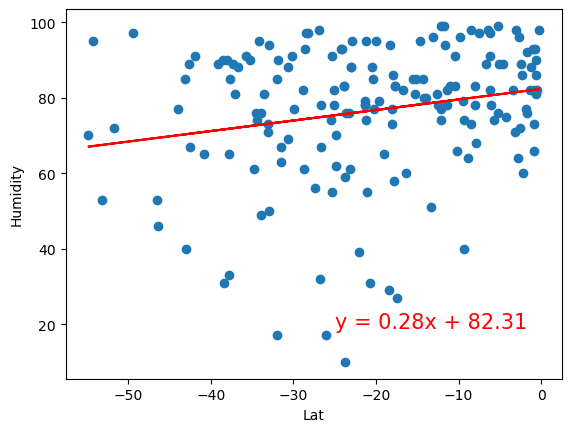

In [18]:
# Southern Hemisphere
South_Hem_Hum = makeLinRegression(southern_hemi_df, "Lat", "Humidity", (-25,19))

**Discussion about the linear relationship:** Referring to the plots above, there is not a relationship for humidity and the latitude for both northern and southern hemispheres.

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03455002513658147


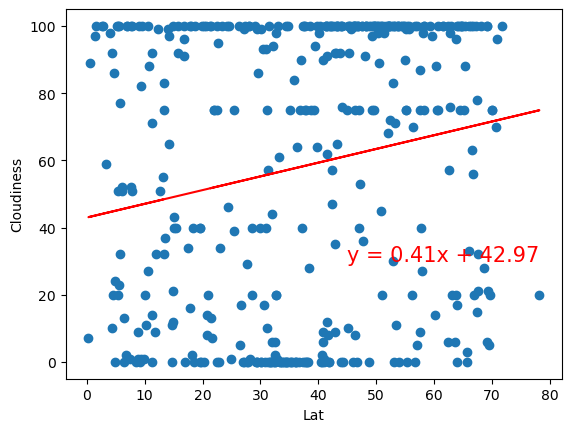

In [19]:
# Northern Hemisphere
North_Hem_Cl = makeLinRegression(northern_hemi_df, "Lat", "Cloudiness", (45,30))

The r-value is: 0.03398497187732321


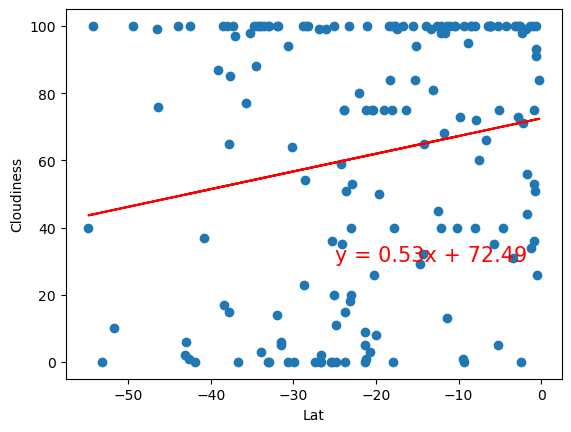

In [20]:
# Southern Hemisphere
South_Hem_Cl = makeLinRegression(southern_hemi_df, "Lat", "Cloudiness", (-25,30))

**Discussion about the linear relationship:** Referring to the plots above, there is not a relationship for cloudiness and the latitude for both northern and southern hemispheres.

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004870288933216318


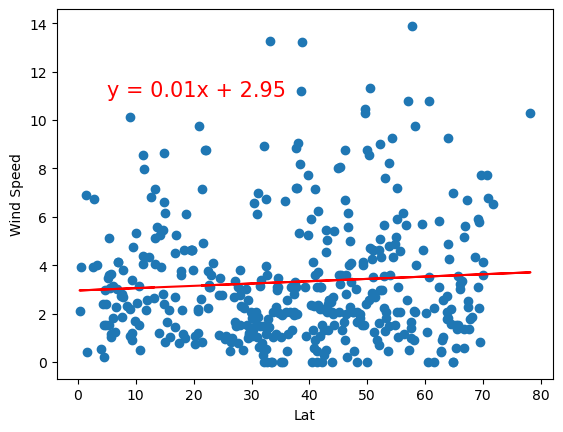

In [21]:
# Northern Hemisphere
North_Hem_W = makeLinRegression(northern_hemi_df, "Lat", "Wind Speed", (5,11))

The r-value is: 0.18116703460899544


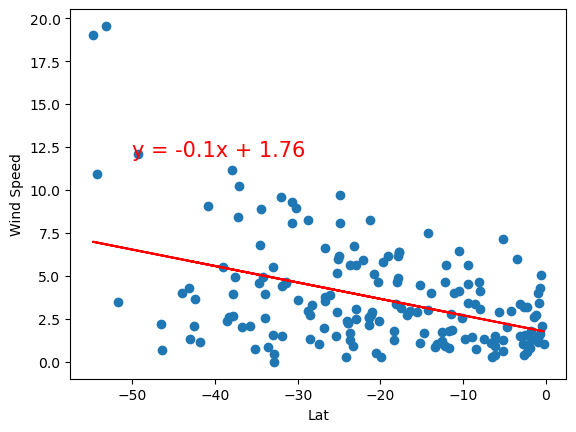

In [22]:
# Southern Hemisphere
South_Hem_W = makeLinRegression(southern_hemi_df, "Lat", "Wind Speed", (-50,12))

**Discussion about the linear relationship:** Referring to the plots above, there is not a relationship for wind speed and the latitude for both northern and southern hemispheres.